In [1]:
from utils_dea import *

## MAMI

In [3]:
#load dfs
mami_training_df = load_dataset("MAMI")
mami_test_df = load_dataset("MAMI",split_name="test")

### Training

In [4]:
print("MAMI training missing values:\n", mami_training_df.isnull().sum())

MAMI training missing values:
 meme id                0
meme text              0
meme caption           0
bert representation    0
svm representation     0
misogynous             0
shaming                0
stereotype             0
objectification        0
violence               0
dtype: int64


In [5]:
mami_only_positive = mami_training_df.loc[mami_training_df["misogynous"] == "1"] #only the instances with positive class in binary level
mami_only_positive_classes = mami_only_positive[["shaming","stereotype","objectification","violence"]]
all_zeros = mami_only_positive_classes[(mami_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
print(f"There are {len(all_zeros)} mysonous memes with no fine-grained label\n")
all_zeros.info()

There are 248 mysonous memes with no fine-grained label

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 10018.jpg to 9964.jpg
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   shaming          248 non-null    object
 1   stereotype       248 non-null    object
 2   objectification  248 non-null    object
 3   violence         248 non-null    object
dtypes: object(4)
memory usage: 9.7+ KB


Label distribution for MAMI Training

Total non-misogynous instances: 5000
Total misogynous instances: 5000
Total shaming instances: 1274
Total stereotype instances: 2810
Total objectification instances: 2202
Total violence instances: 953



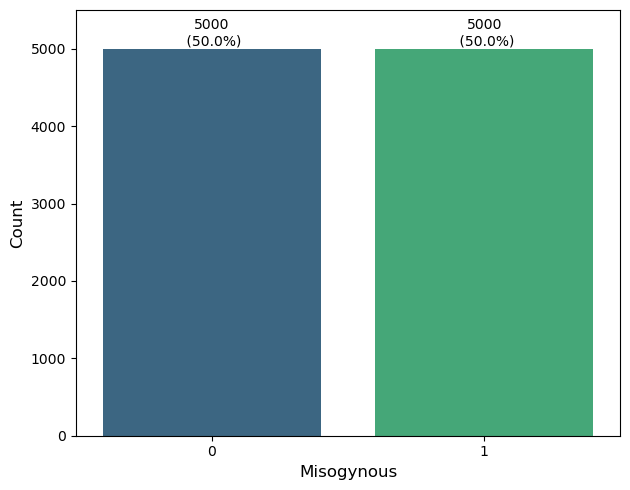

Total shaming instances when meme is misogynous: 1271
Total stereotype instances when meme is misogynous: 2810
Total objectification instances when meme is misogynous: 2201
Total violence instances when meme is misogynous: 953



/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


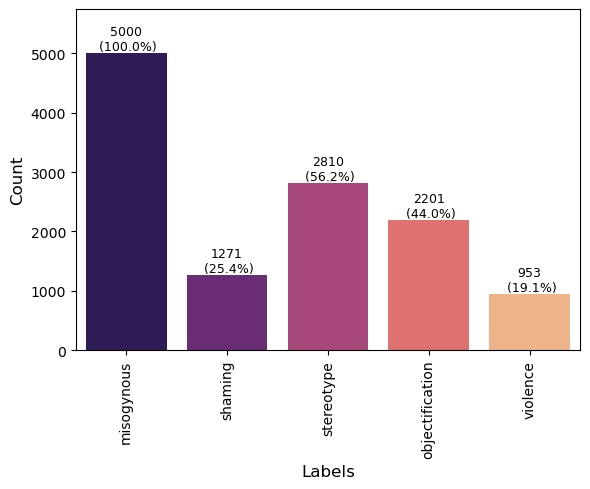

/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


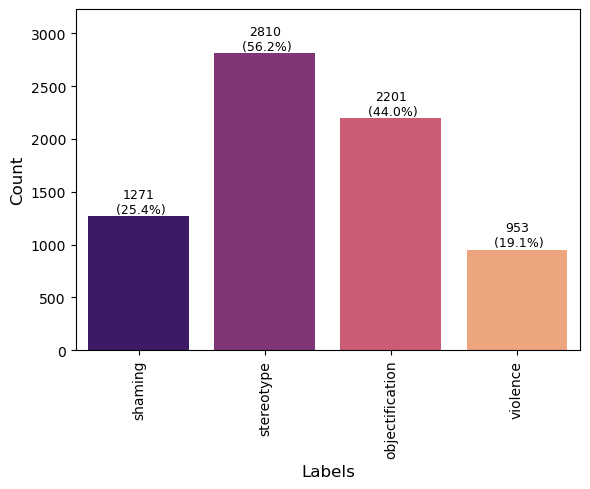

Total non-misogynous instances: 5000
Total shaming instances when meme is non-misogynous: 3
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 1
Total violence instances when meme is non-misogynous: 0


In [4]:
mami_labels = ["misogynous", "shaming","stereotype", "objectification", "violence"]
analyze_label_distribution(mami_training_df, "misogynous", mami_labels,split="Training")

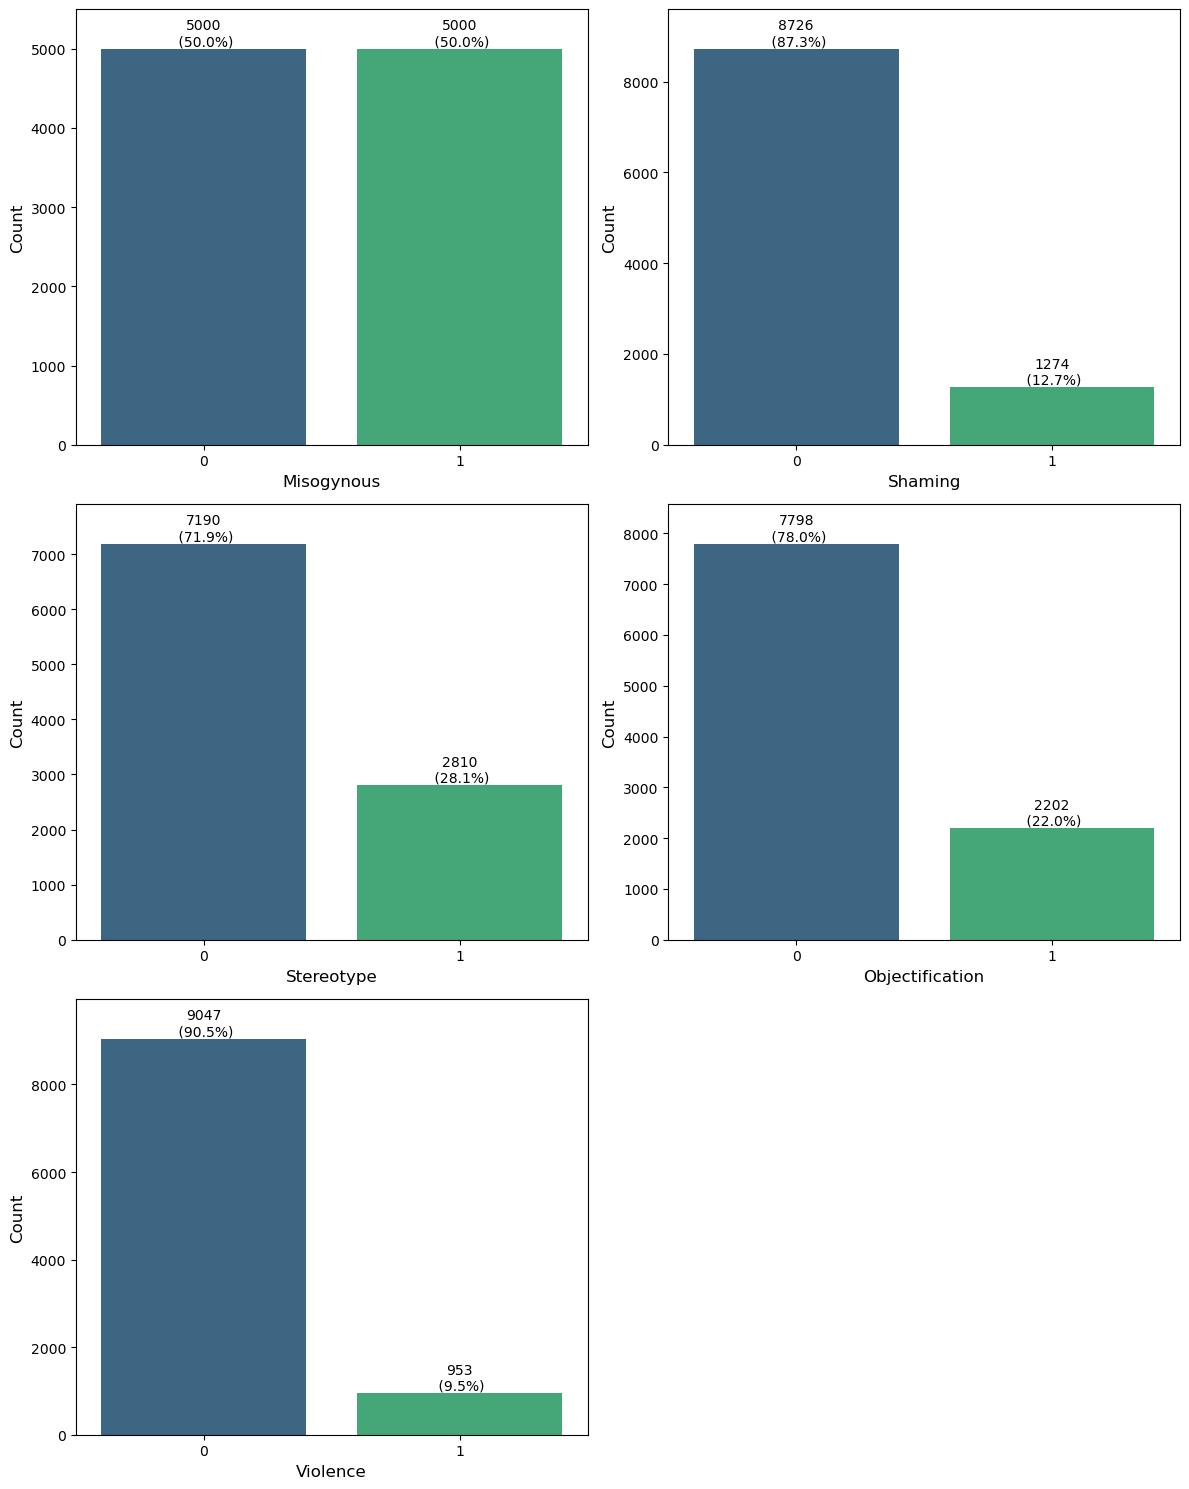

In [4]:
mami_labels = ["misogynous", "shaming","stereotype", "objectification", "violence"]
plot_labels_distribution(mami_training_df,mami_labels)

### Test

In [8]:
print("MAMI test missing values:\n", mami_test_df.isnull().sum())

MAMI test missing values:
 meme id                0
meme text              0
meme caption           0
bert representation    0
svm representation     0
misogynous             0
shaming                0
stereotype             0
objectification        0
violence               0
dtype: int64


Label distribution for MAMI Test

Total non-misogynous instances: 500
Total misogynous instances: 500
Total shaming instances: 146
Total stereotype instances: 350
Total objectification instances: 348
Total violence instances: 153



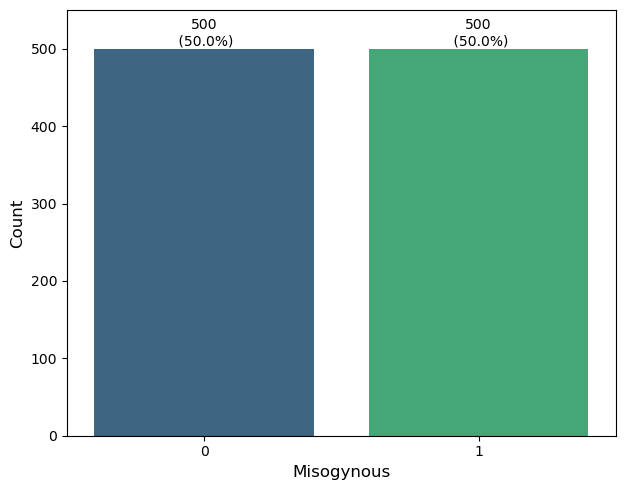

Total shaming instances when meme is misogynous: 146
Total stereotype instances when meme is misogynous: 350
Total objectification instances when meme is misogynous: 348
Total violence instances when meme is misogynous: 153



/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


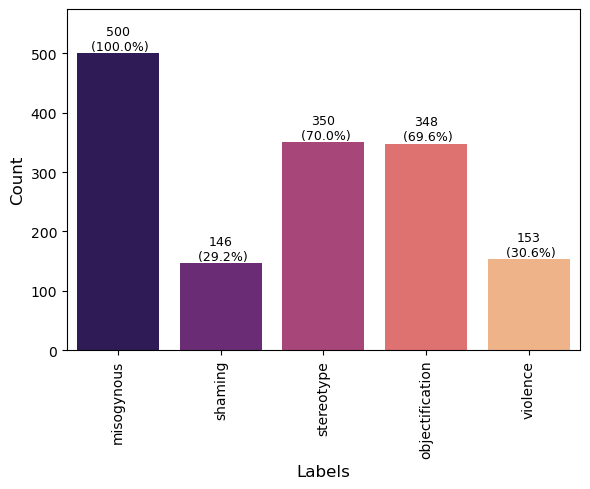

/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


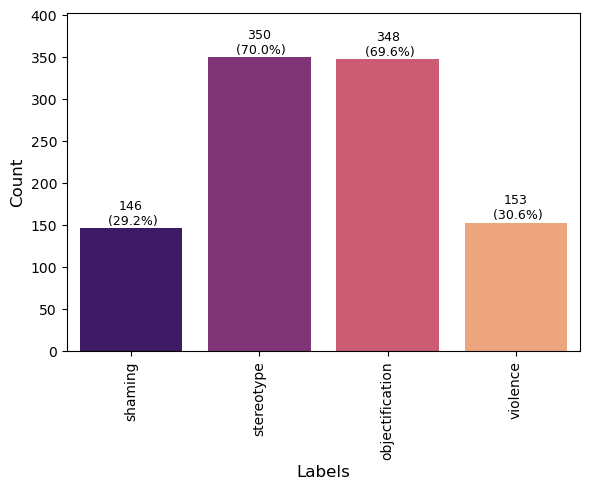

Total non-misogynous instances: 500
Total shaming instances when meme is non-misogynous: 0
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 0
Total violence instances when meme is non-misogynous: 0


In [5]:
analyze_label_distribution(mami_test_df, "misogynous", mami_labels,split="Test")

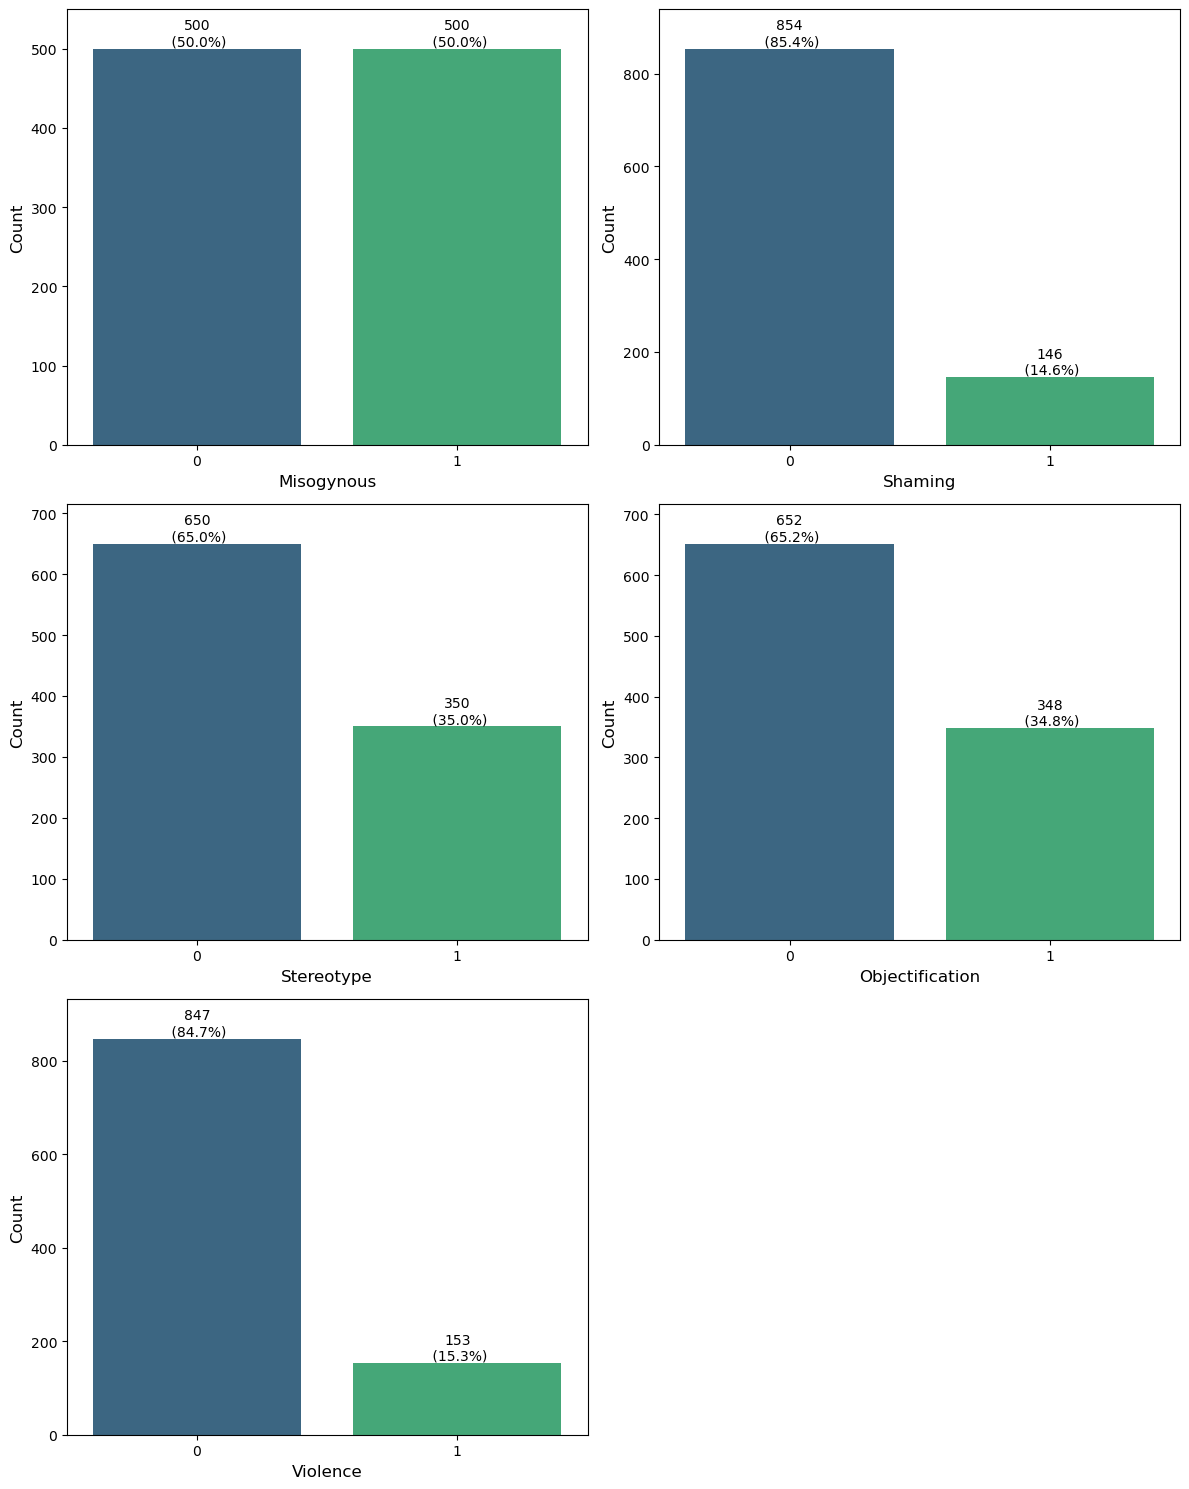

In [5]:
mami_labels = ["misogynous", "shaming","stereotype", "objectification", "violence"]
plot_labels_distribution(mami_test_df,mami_labels)

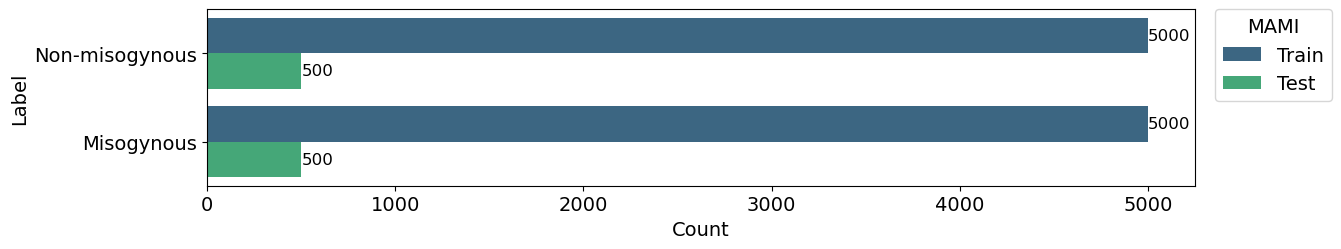

In [4]:
plot_binary_label_distribution(
    dfs=[mami_training_df, mami_test_df],
    label="misogynous",
    splits=["Train", "Test"]
)

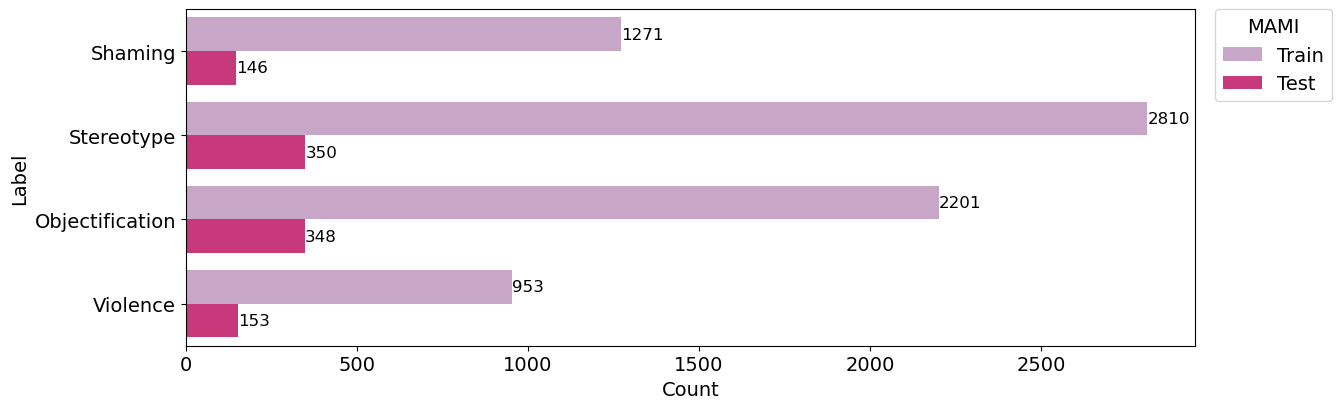

In [5]:
plot_label_distribution_filtered_df_multi(
    dfs=[mami_training_df, mami_test_df],
    labels=["shaming","stereotype", "objectification", "violence"],
    ds_names=["MAMI", "MAMI"],
    target_value="1",
    splits=["Train", "Test"]
)

## EXIST2024

In [3]:
exist_df = load_dataset("EXIST2024")

In [11]:
print("\nEXIST2024 Missing Values:\n", exist_df.isnull().sum())


EXIST2024 Missing Values:
 meme id                           0
meme text                         0
meme caption                      0
bert representation               0
svm representation                0
sexist                          302
ideological-inequality          309
misogyny-non-sexual-violence    309
objectification                 309
sexual-violence                 309
stereotyping-dominance          309
dtype: int64


In [12]:
sexist = exist_df['sexist'].value_counts()["1"]
non_sexist = exist_df['sexist'].value_counts()["0"]
print(f"Number of sexist memes: {sexist}")
print(f"Number of non-sexist memes: {non_sexist}")
print(f"Total {sexist+non_sexist}")

Number of sexist memes: 965
Number of non-sexist memes: 743
Total 1708


In [13]:
#let's drop memes with no hard labels and check the distribution of labels once again
#memes missing either or both sexism and category labels are dropped
exist_df.dropna(inplace=True)
sexist = exist_df['sexist'].value_counts()["1"]
non_sexist = exist_df['sexist'].value_counts()["0"]
print(f"Number of sexist memes: {sexist}")
print(f"Number of non-sexist memes: {non_sexist}")
print(f"Total {sexist+non_sexist}")

Number of sexist memes: 958
Number of non-sexist memes: 743
Total 1701


In [5]:
exist_only_positive = exist_df.loc[exist_df["sexist"] == "1"] #only the instances with positive class in binary level
exist_only_positive_classes = exist_only_positive[["sexist","ideological-inequality","misogyny-non-sexual-violence","objectification","sexual-violence","stereotyping-dominance"]]
all_zeros = exist_only_positive_classes[(exist_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
all_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   sexist                        0 non-null      object
 1   ideological-inequality        0 non-null      object
 2   misogyny-non-sexual-violence  0 non-null      object
 3   objectification               0 non-null      object
 4   sexual-violence               0 non-null      object
 5   stereotyping-dominance        0 non-null      object
dtypes: object(6)
memory usage: 0.0+ bytes


Label distribution for EXIST2024 

Total non-sexist instances: 743
Total sexist instances: 965
Total ideological-inequality instances: 408
Total misogyny-non-sexual-violence instances: 180
Total objectification instances: 459
Total sexual-violence instances: 213
Total stereotyping-dominance instances: 480



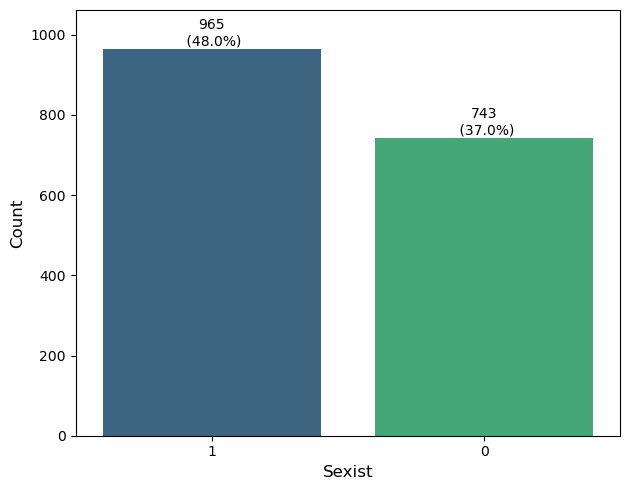

Total ideological-inequality instances when meme is sexist: 408
Total misogyny-non-sexual-violence instances when meme is sexist: 180
Total objectification instances when meme is sexist: 459
Total sexual-violence instances when meme is sexist: 213
Total stereotyping-dominance instances when meme is sexist: 480



/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


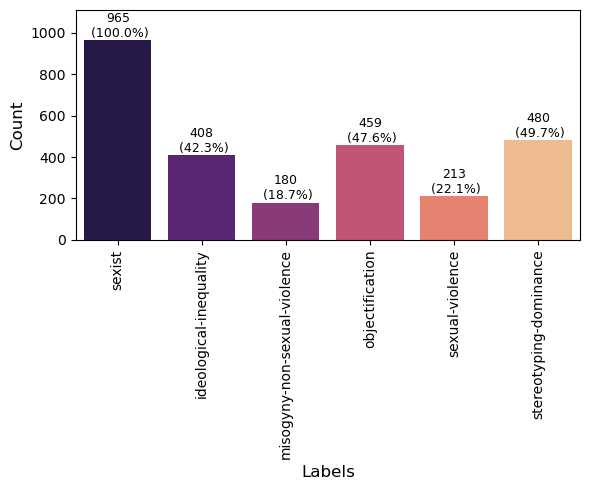

/Users/arianabritez/Documents/research-master/thesis/preprocessing/utils_dea.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette="magma")


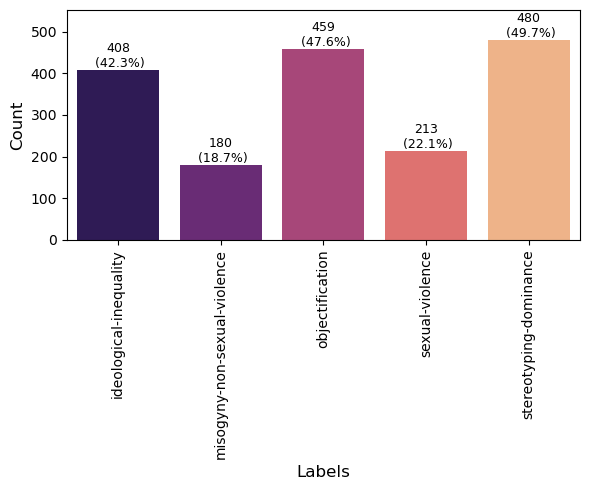

Total non-sexist instances: 743
Total ideological-inequality instances when meme is non-sexist: 0
Total misogyny-non-sexual-violence instances when meme is non-sexist: 0
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [6]:
exist_labels = ["sexist","ideological-inequality","misogyny-non-sexual-violence","objectification","sexual-violence","stereotyping-dominance"]
analyze_label_distribution(exist_df, "sexist", exist_labels,dataset="EXIST2024")

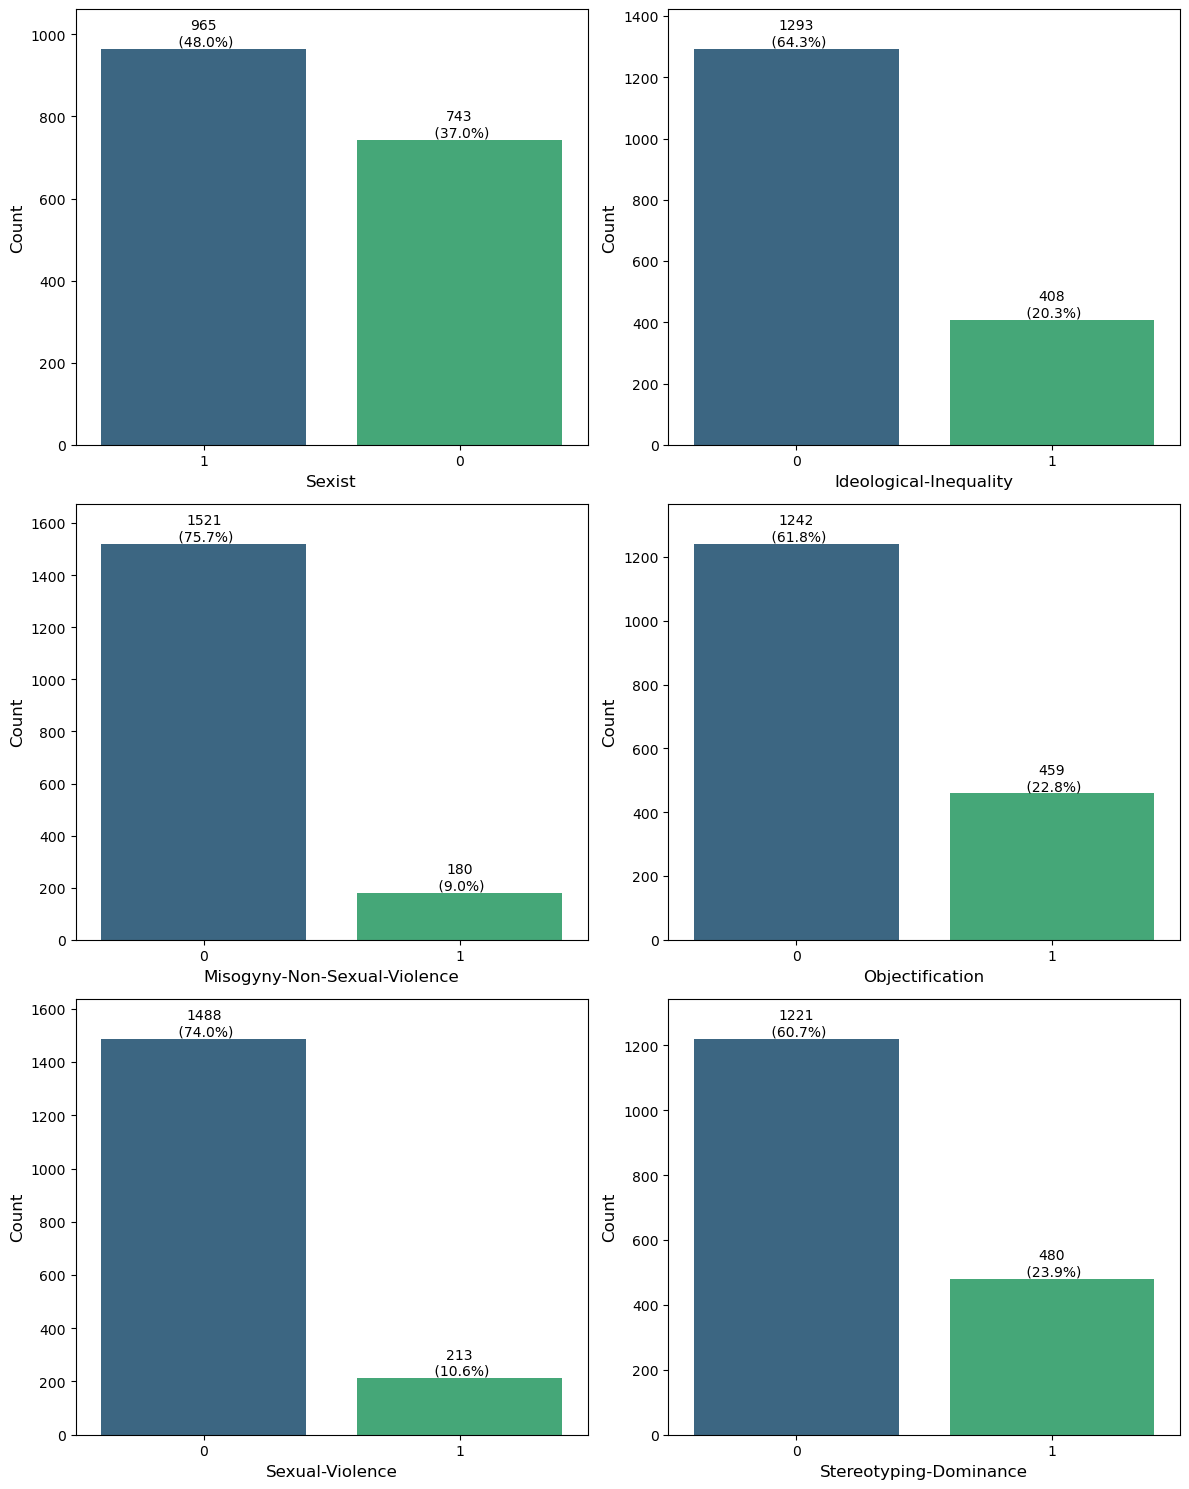

In [4]:
plot_labels_distribution(exist_df,exist_labels)

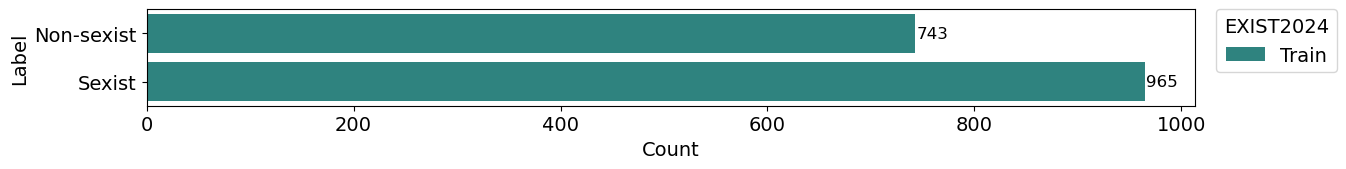

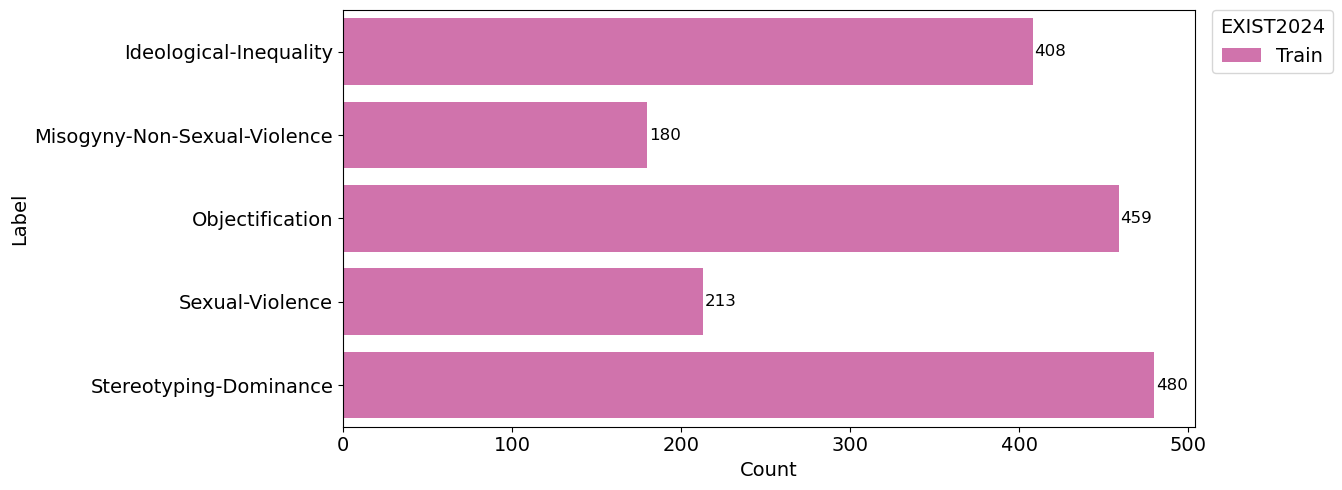

In [8]:
plot_binary_label_distribution(
    dfs=[exist_df],
    label="sexist",
    ds_names=["EXIST2024"],
    splits=["Train"]
)
plot_label_distribution_filtered_df_multi(
    dfs=[exist_df],
    labels=["ideological-inequality","misogyny-non-sexual-violence","objectification","sexual-violence","stereotyping-dominance"],
    ds_names=["EXIST2024"],
    target_value="1",
    splits=["Train"]
)

## Stratified sampling

### EXIST

In [8]:
exist_train_df, exist_test_df = split_multilabel_data(exist_df, exist_labels, test_size=0.1, random_state=0)
exist_train_df, exist_val_df = split_multilabel_data(exist_train_df, exist_labels, test_size=0.1, random_state=0)

#### Training split

Label distribution for EXIST2024 training

Total non-sexist instances: 594
Total sexist instances: 783
Total ideological-inequality instances: 333
Total misogyny-non-sexual-violence instances: 147
Total objectification instances: 375
Total sexual-violence instances: 186
Total stereotyping-dominance instances: 401



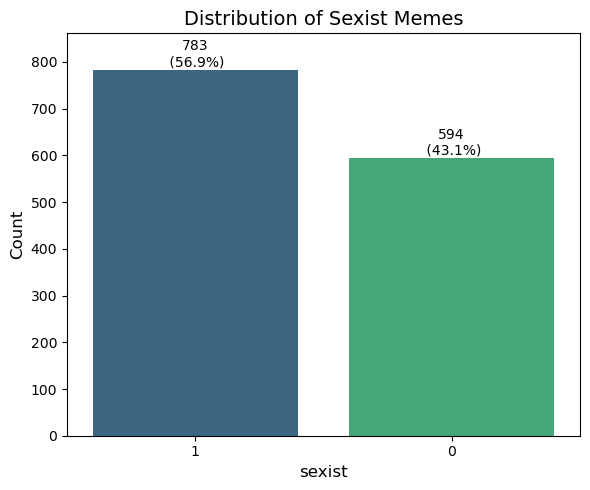

Total ideological-inequality instances when meme is sexist: 333
Total misogyny-non-sexual-violence instances when meme is sexist: 147
Total objectification instances when meme is sexist: 375
Total sexual-violence instances when meme is sexist: 186
Total stereotyping-dominance instances when meme is sexist: 401



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


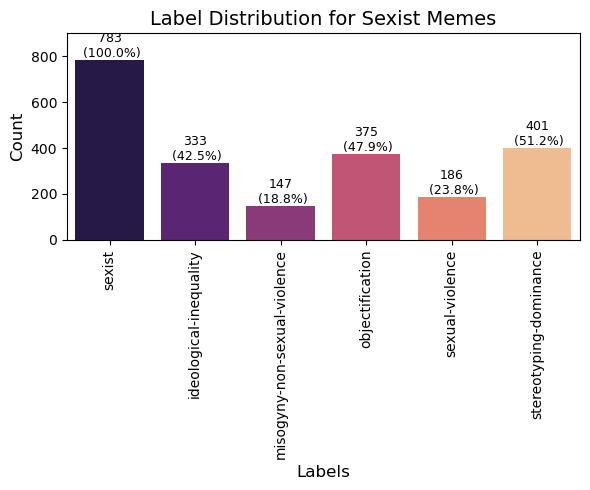

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


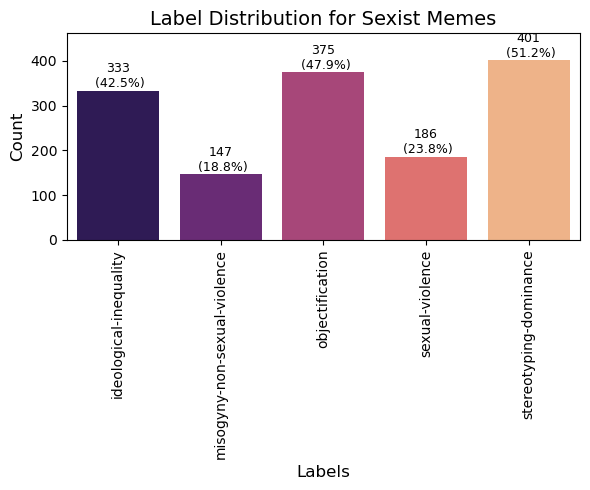

Total non-sexist instances: 594
Total ideological-inequality instances when meme is non-sexist: 0
Total misogyny-non-sexual-violence instances when meme is non-sexist: 0
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [16]:
analyze_label_distribution(exist_train_df, "sexist", exist_labels,split="training",dataset="EXIST2024")

#### Test split

Label distribution for EXIST2024 test

Total non-sexist instances: 76
Total sexist instances: 95
Total ideological-inequality instances: 39
Total misogyny-non-sexual-violence instances: 16
Total objectification instances: 43
Total sexual-violence instances: 16
Total stereotyping-dominance instances: 40



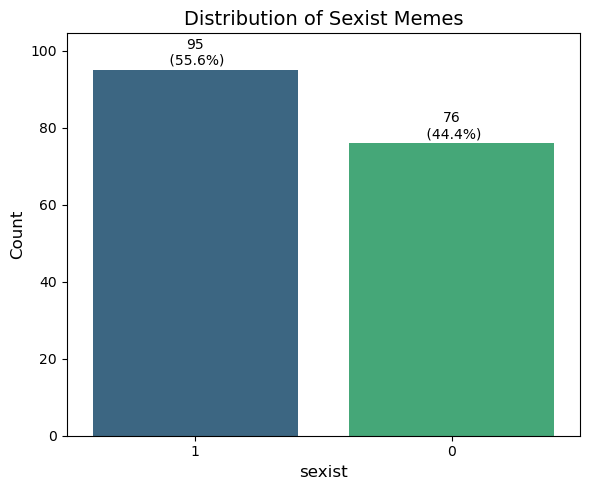

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Total ideological-inequality instances when meme is sexist: 39
Total misogyny-non-sexual-violence instances when meme is sexist: 16
Total objectification instances when meme is sexist: 43
Total sexual-violence instances when meme is sexist: 16
Total stereotyping-dominance instances when meme is sexist: 40



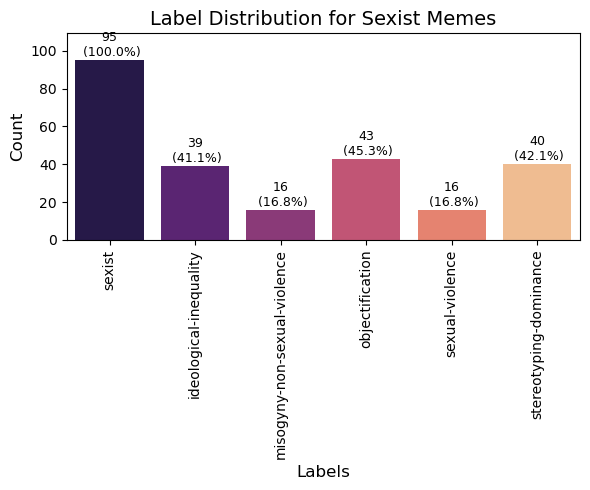

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


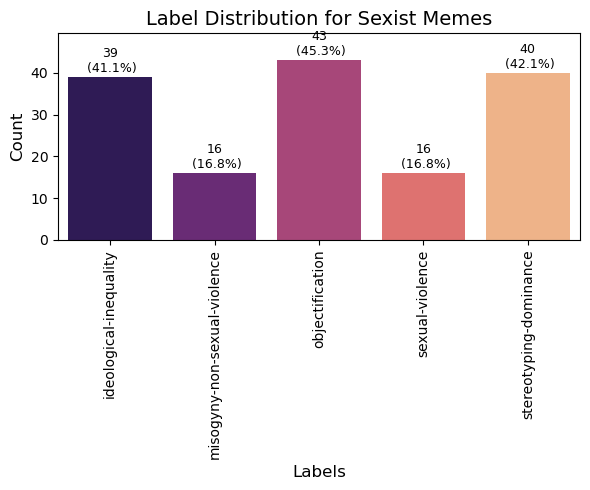

Total non-sexist instances: 76
Total ideological-inequality instances when meme is non-sexist: 0
Total misogyny-non-sexual-violence instances when meme is non-sexist: 0
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [17]:
analyze_label_distribution(exist_test_df, "sexist", exist_labels,split="test",dataset="EXIST2024")

#### Validation split

Label distribution for EXIST2024 validation

Total non-sexist instances: 73
Total sexist instances: 80
Total ideological-inequality instances: 36
Total misogyny-non-sexual-violence instances: 17
Total objectification instances: 41
Total sexual-violence instances: 11
Total stereotyping-dominance instances: 39



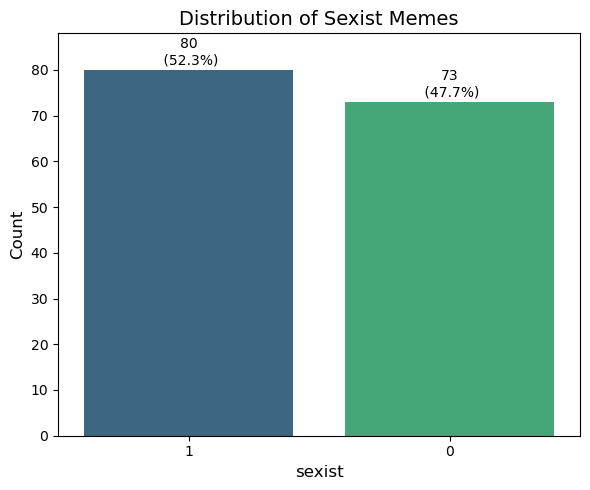

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Total ideological-inequality instances when meme is sexist: 36
Total misogyny-non-sexual-violence instances when meme is sexist: 17
Total objectification instances when meme is sexist: 41
Total sexual-violence instances when meme is sexist: 11
Total stereotyping-dominance instances when meme is sexist: 39



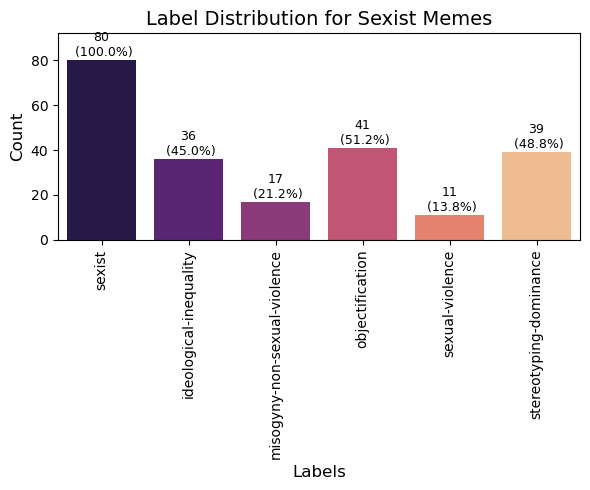

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


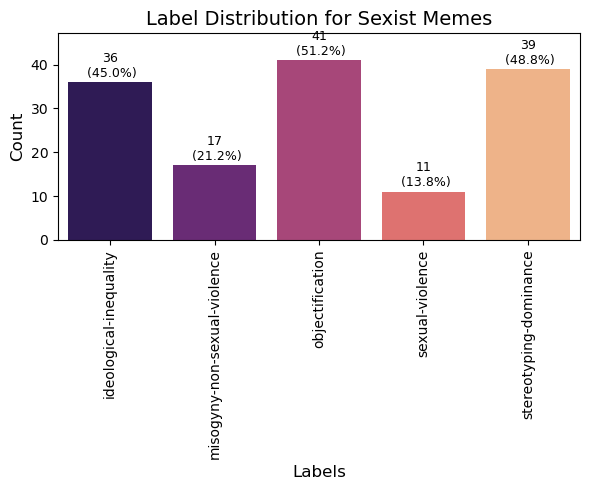

Total non-sexist instances: 73
Total ideological-inequality instances when meme is non-sexist: 0
Total misogyny-non-sexual-violence instances when meme is non-sexist: 0
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [18]:
analyze_label_distribution(exist_val_df, "sexist", exist_labels,split="validation",dataset="EXIST2024")

In [19]:
new_dir = "../data"
datasets = ["MAMI","EXIST2024"]
for dataset in datasets:
    if not os.path.exists(f"{new_dir}/{dataset}"):
        os.makedirs(f"{new_dir}/{dataset}")

In [20]:
#save splits to json files
dataset_name = "EXIST2024"
splits = ["training","test","validation"]
#return back to dict to save to json format
exist_training_dict = exist_train_df.to_dict(orient="index") 
exist_test_dict = exist_test_df.to_dict(orient="index")
exist_val_dict = exist_val_df.to_dict(orient="index")
dataset_dicts = [exist_training_dict,exist_test_dict,exist_val_dict]

for data_dict, split_name in zip(dataset_dicts,splits):
    #save the split dictionary to a JSON file
    output_file = f"{new_dir}/{dataset_name}/{dataset_name}_{split_name}.json"
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(data_dict, f, ensure_ascii=False, indent=4)
    print(f"Saved {dataset_name} {split_name} split to {output_file}")


Saved EXIST2024 training split to ../data/EXIST2024/EXIST2024_training.json
Saved EXIST2024 test split to ../data/EXIST2024/EXIST2024_test.json
Saved EXIST2024 validation split to ../data/EXIST2024/EXIST2024_validation.json


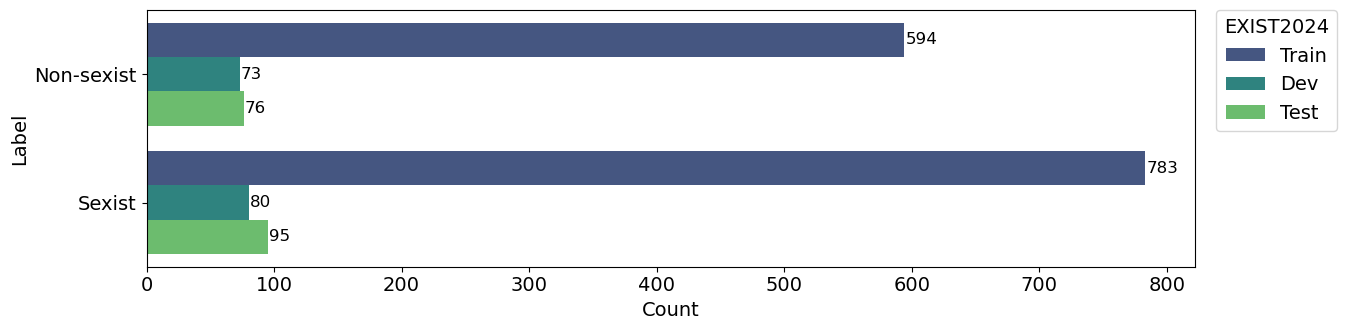

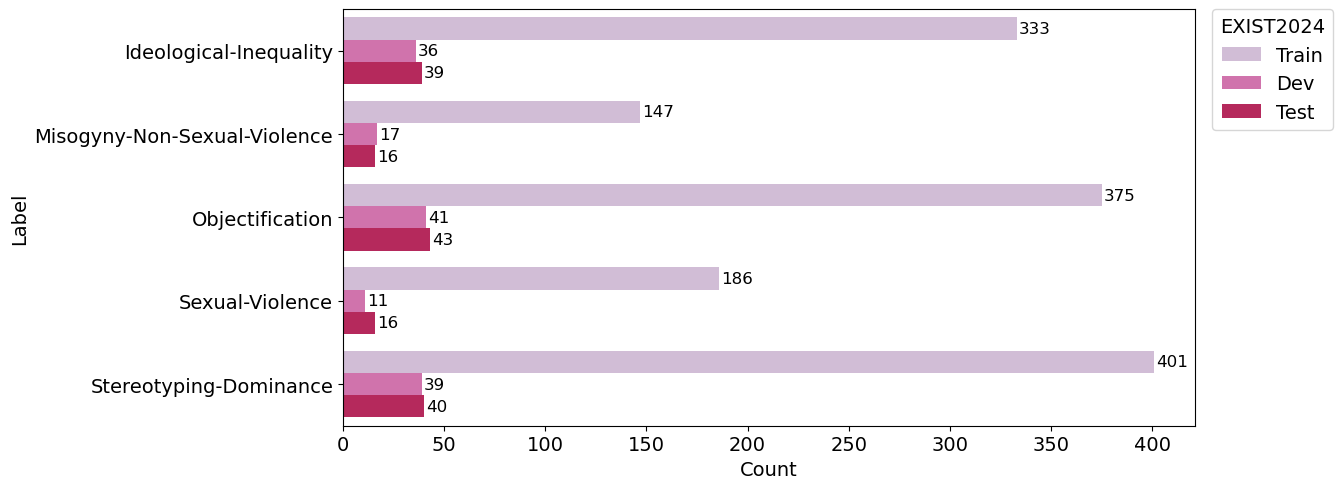

In [28]:
## analyze distribution altogether:
exist_training_df_ = pd.read_json("../data/EXIST2024/EXIST2024_training.json",orient='index',dtype=str,)
exist_test_df_ = pd.read_json("../data/EXIST2024/EXIST2024_test.json",orient='index',dtype=str)
exist_val_df_ = pd.read_json("../data/EXIST2024/EXIST2024_validation.json",orient='index',dtype=str)

plot_binary_label_distribution(
    dfs=[exist_training_df_,exist_val_df_,exist_test_df_],
    label="sexist",
    ds_names=["EXIST2024","EXIST2024","EXIST2024"],
    splits=["Train","Dev","Test"]
)
plot_label_distribution_filtered_df_multi(
    dfs=[exist_training_df_,exist_val_df_,exist_test_df_],
    labels=["ideological-inequality","misogyny-non-sexual-violence","objectification","sexual-violence","stereotyping-dominance"],
    ds_names=["EXIST2024","EXIST2024","EXIST2024"],
    target_value="1",
    splits=["Train","Dev","Test"]
)

### MAMI

In [21]:
#let's split training and validation for easier during model training and evaluation
mami_train_df, mami_val_df = split_multilabel_data(mami_training_df, mami_labels, test_size=0.1, random_state=0)

#### Training

Label distribution for MAMI training

Total non-misogynous instances: 4517
Total misogynous instances: 4483
Total shaming instances: 1135
Total stereotype instances: 2519
Total objectification instances: 1978
Total violence instances: 846



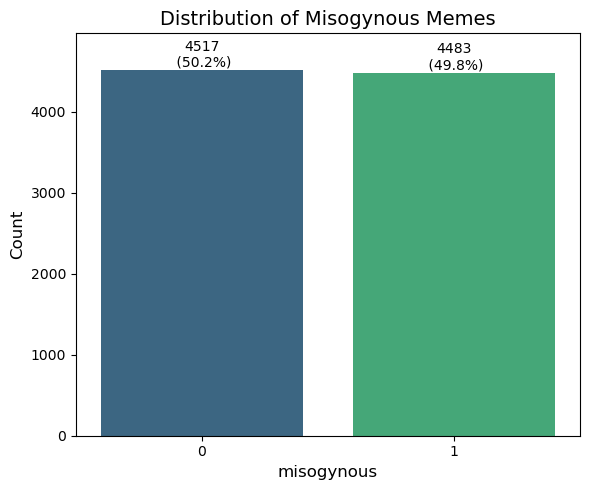

Total shaming instances when meme is misogynous: 1132
Total stereotype instances when meme is misogynous: 2519
Total objectification instances when meme is misogynous: 1978
Total violence instances when meme is misogynous: 846



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


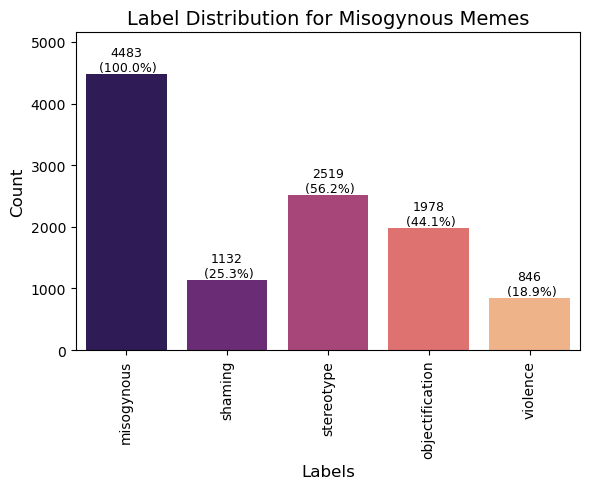

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


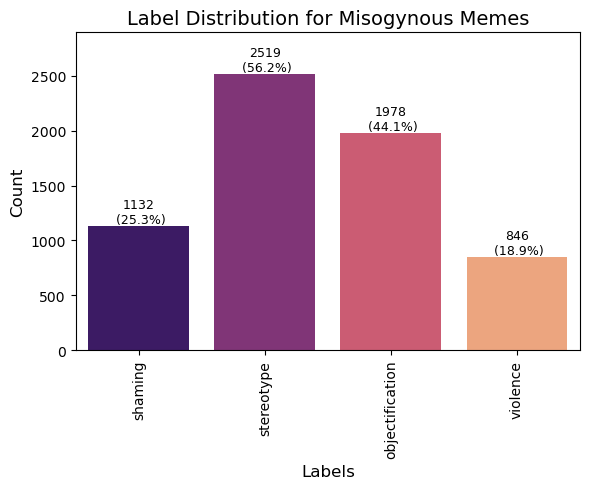

Total non-misogynous instances: 4517
Total shaming instances when meme is non-misogynous: 3
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 0
Total violence instances when meme is non-misogynous: 0


In [22]:
analyze_label_distribution(mami_train_df, "misogynous", mami_labels,split="training")

#### Validation

Label distribution for MAMI validation

Total non-misogynous instances: 483
Total misogynous instances: 517
Total shaming instances: 139
Total stereotype instances: 291
Total objectification instances: 224
Total violence instances: 107



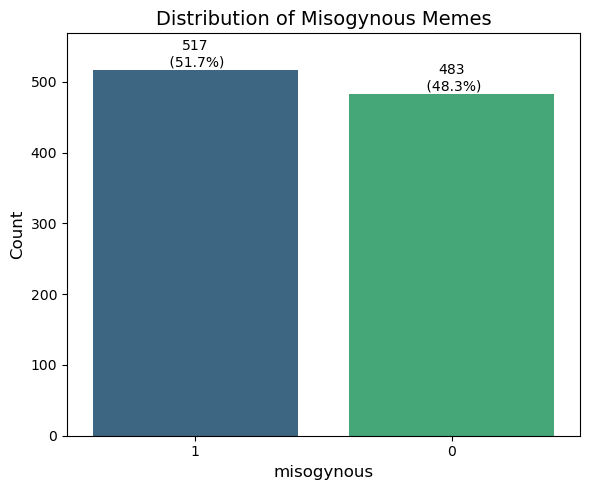

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Total shaming instances when meme is misogynous: 139
Total stereotype instances when meme is misogynous: 291
Total objectification instances when meme is misogynous: 223
Total violence instances when meme is misogynous: 107



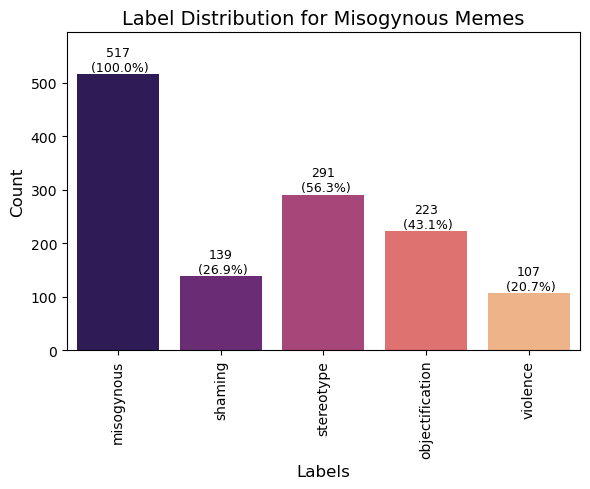

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


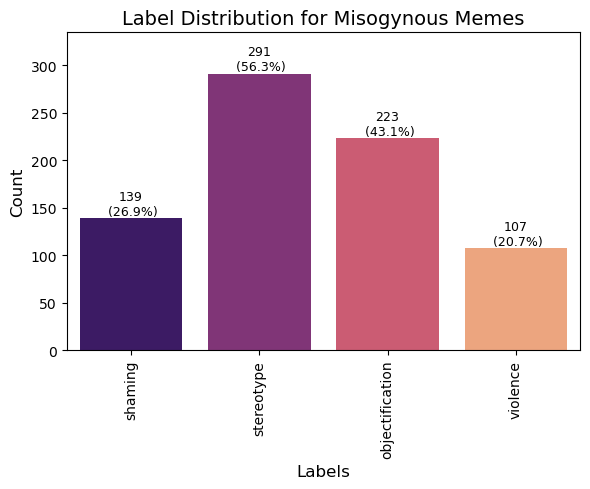

Total non-misogynous instances: 483
Total shaming instances when meme is non-misogynous: 0
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 1
Total violence instances when meme is non-misogynous: 0


In [23]:
analyze_label_distribution(mami_val_df, "misogynous", mami_labels,split="validation")

In [24]:
#save splits to json files

dataset_name = "MAMI"
splits = ["training","validation"]
#return back to dict to save to json format
mami_train_dict = mami_train_df.to_dict(orient="index") 
mami_val_dict = mami_val_df.to_dict(orient="index")
dataset_dicts = [mami_train_dict,mami_val_dict]

for data_dict, split_name in zip(dataset_dicts,splits):
    #save the split dictionary to a JSON file
    output_file = f"{new_dir}/{dataset_name}/{dataset_name}_{split_name}.json"
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(data_dict, f, ensure_ascii=False, indent=4)
    print(f"Saved {dataset_name} {split_name} split to {output_file}")


Saved MAMI training split to ../data/MAMI/MAMI_training.json
Saved MAMI validation split to ../data/MAMI/MAMI_validation.json


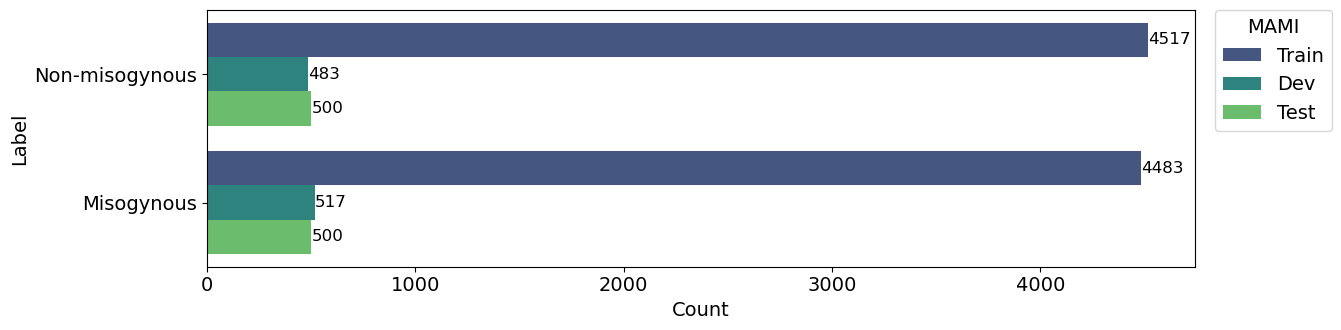

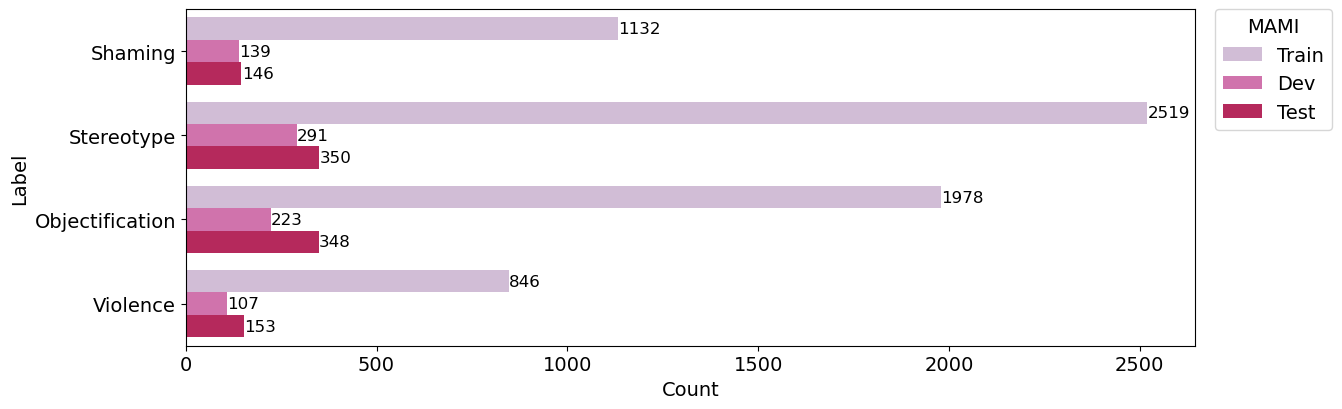

In [24]:
## analyze distribution altogether:
mami_training_df_ = pd.read_json("../data/MAMI/MAMI_training.json",orient='index',dtype=str,)
mami_test_df_ = pd.read_json("../data/MAMI/MAMI_test.json",orient='index',dtype=str)
mami_val_df_ = pd.read_json("../data/MAMI/MAMI_validation.json",orient='index',dtype=str)

plot_binary_label_distribution(
    dfs=[mami_training_df_,mami_val_df_,mami_test_df_],
    label="misogynous",
    ds_names=["MAMI","MAMI","MAMI"],
    splits=["Train","Dev","Test"]
)
plot_label_distribution_filtered_df_multi(
    dfs=[mami_training_df_,mami_val_df_,mami_test_df_],
    labels=["shaming","stereotype","objectification","violence"],
    ds_names=["MAMI","MAMI","MAMI"],
    target_value="1",
    splits=["Train","Dev","Test"]
)

## Reduce datasets to overlapping categories: objectification, stereotype and violence

In [2]:
#starting with EXIST since it's smaller

In [2]:
mami_labels_overlapping = ["stereotype", "objectification", "violence"]
exist_labels_overlapping = ["objectification","sexual-violence","stereotyping-dominance"]

### EXIST

#### Train and dev

In [3]:
#I will take the splits already processed for regular in-domain setup and merge them into one whole df again 
# to drop the non-overlapping categories and split into training and validation again
exist_training_data = "../data/EXIST2024/EXIST2024_training.json"
exist_dev_data = "../data/EXIST2024/EXIST2024_validation.json"
exist_train_df = pd.read_json(exist_training_data,orient="index")
exist_dev_df = pd.read_json(exist_dev_data,orient="index")

exist_train_df = pd.concat([exist_train_df, exist_dev_df]).sort_index()

In [4]:
exist_train_overlap = pd.concat([exist_train_df.iloc[:,:7],exist_train_df[exist_labels_overlapping]],axis=1).astype(str) #get the first columns with data and binary class and only the overlapping categories
exist_only_positive = exist_train_overlap.loc[exist_train_overlap["sexist"] == "1"] #only the instances with positive class in binary level
exist_only_positive_classes = exist_only_positive[exist_labels_overlapping]
all_zeros = exist_only_positive_classes[(exist_only_positive_classes == "0").all(axis=1)] #get the instances for which there are no labels in the fine-grained classes
exist_train_overlap = exist_train_overlap.drop(index=all_zeros.index) #drop the instances with no labels in the fine-grained classes when the meme is positive at binary label (misogynyous/sexist)

In [5]:
#double checking that there are indeed no classes with 0 under the positive binary class
exist_only_positive = exist_train_overlap.loc[exist_train_overlap["sexist"] == "1"] #only the instances with positive class in binary level
exist_only_positive_classes = exist_only_positive[exist_labels_overlapping]
all_zeros = exist_only_positive_classes[(exist_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
print(f"There are {len(all_zeros)} sexist memes with no fine-grained label\n")
all_zeros.info()

There are 0 sexist memes with no fine-grained label

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   objectification         0 non-null      object
 1   sexual-violence         0 non-null      object
 2   stereotyping-dominance  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [6]:
#check distribution of labels before splitting
new_exist_labels = ["sexist"]+exist_labels_overlapping
print(f"Label distribution for EXIST training\n")
non_label_instances = exist_train_overlap["sexist"].value_counts().get("0", 0)
print(f"Total non-sexist instances: {non_label_instances}")
    
#count total instances for each label
for lbl in new_exist_labels:
    total = exist_train_overlap[lbl].value_counts().get("1", 0)
    print(f"Total {lbl} instances: {total}")

Label distribution for EXIST training

Total non-sexist instances: 667
Total sexist instances: 725
Total objectification instances: 416
Total sexual-violence instances: 197
Total stereotyping-dominance instances: 440


In [7]:
new_exist_labels = ["sexist"]+exist_labels_overlapping
exist_train_df, exist_val_df = split_multilabel_data(exist_train_overlap, new_exist_labels, test_size=0.1, random_state=0)

Label distribution for EXIST2024 training

Total non-sexist instances: 594
Total sexist instances: 658
Total objectification instances: 377
Total sexual-violence instances: 175
Total stereotyping-dominance instances: 400



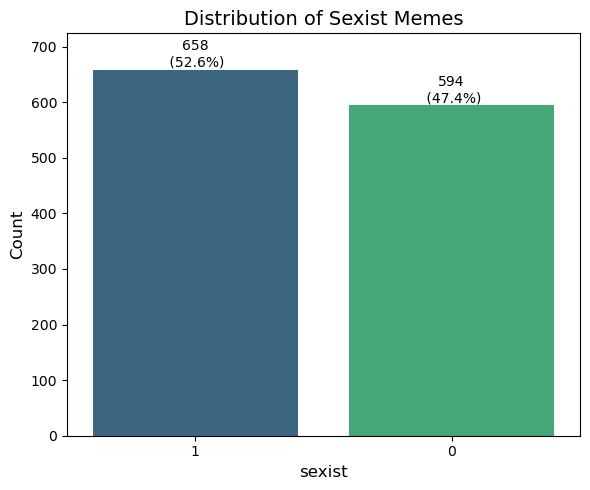

Total objectification instances when meme is sexist: 377
Total sexual-violence instances when meme is sexist: 175
Total stereotyping-dominance instances when meme is sexist: 400



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


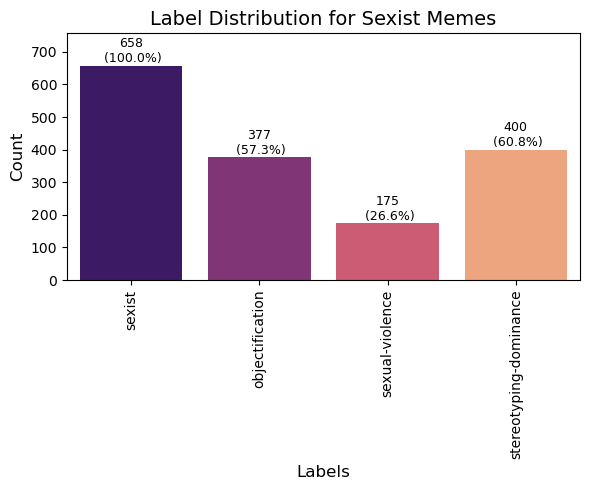

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


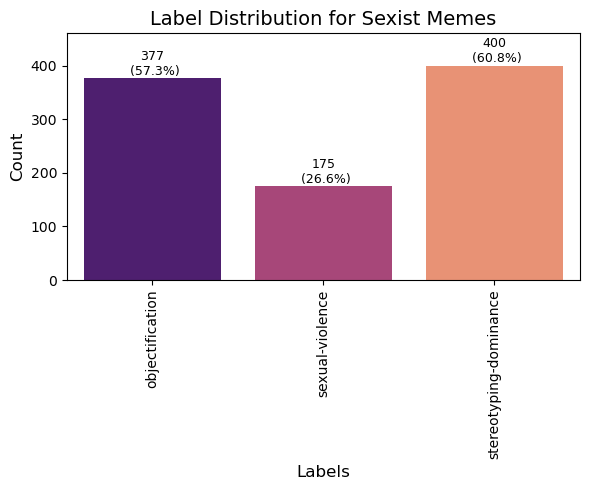

Total non-sexist instances: 594
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [8]:
#analyze the new training split with overlapping fine-grained labels
analyze_label_distribution(exist_train_df, "sexist", new_exist_labels,split="training",dataset="EXIST2024")

Label distribution for EXIST2024 validation

Total non-sexist instances: 73
Total sexist instances: 67
Total objectification instances: 39
Total sexual-violence instances: 22
Total stereotyping-dominance instances: 40



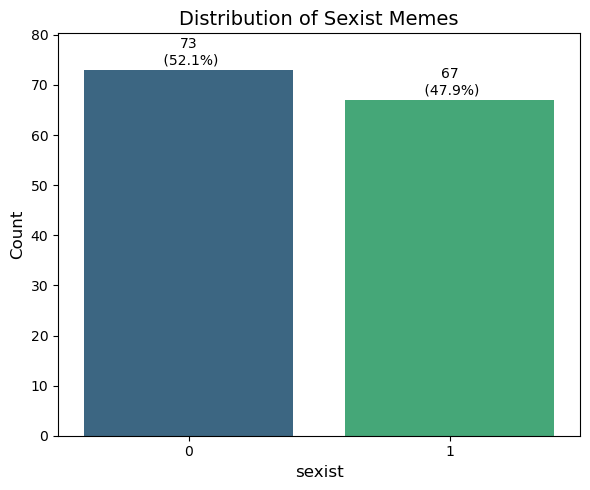

Total objectification instances when meme is sexist: 39
Total sexual-violence instances when meme is sexist: 22
Total stereotyping-dominance instances when meme is sexist: 40



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


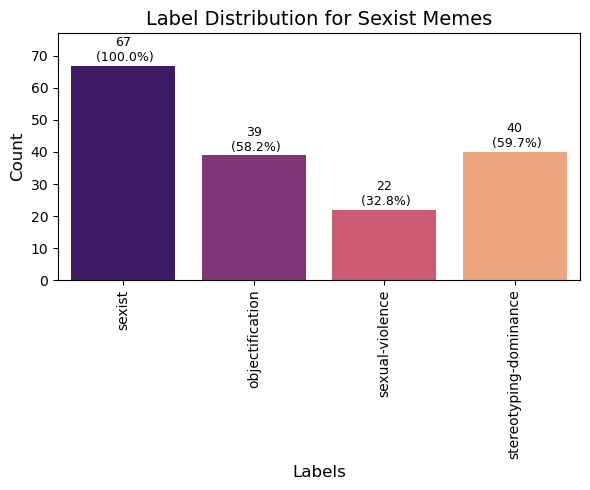

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


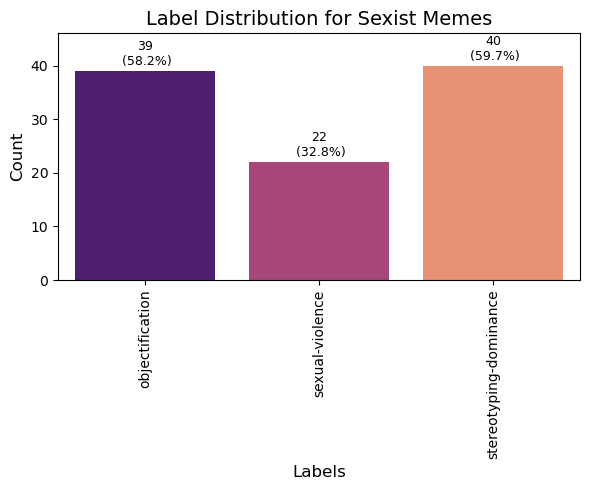

Total non-sexist instances: 73
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [9]:
#analyze the new dev split with overlapping fine-grained labels
analyze_label_distribution(exist_val_df, "sexist", new_exist_labels,split="validation",dataset="EXIST2024")

#### Test

In [10]:
#dropping non-overlapping categories from test set
exist_test_data = "../data/EXIST2024/EXIST2024_test.json"
exist_test_df = pd.read_json(exist_test_data,orient="index")

exist_test_overlap = pd.concat([exist_test_df.iloc[:,:7],exist_test_df[exist_labels_overlapping]],axis=1).astype(str) #get the first columns with data and binary class and only the overlapping categories
exist_only_positive = exist_test_overlap.loc[exist_test_overlap["sexist"] == "1"] #only the instances with positive class in binary level
exist_only_positive_classes = exist_only_positive[exist_labels_overlapping]
all_zeros = exist_only_positive_classes[(exist_only_positive_classes == "0").all(axis=1)] #get the instances for which there are no labels in the fine-grained classes
exist_test_overlap = exist_test_overlap.drop(index=all_zeros.index) #drop the instances with no labels in the fine-grained classes when the meme is positive at binary label (misogynyous/sexist)

In [11]:
#double checking that there are indeed no classes with 0 under the positive binary class
exist_only_positive = exist_test_overlap.loc[exist_test_overlap["sexist"] == "1"] #only the instances with positive class in binary level
exist_only_positive_classes = exist_only_positive[exist_labels_overlapping]
all_zeros = exist_only_positive_classes[(exist_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
print(f"There are {len(all_zeros)} sexist memes with no fine-grained label\n")
all_zeros.info()

There are 0 sexist memes with no fine-grained label

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   objectification         0 non-null      object
 1   sexual-violence         0 non-null      object
 2   stereotyping-dominance  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


Label distribution for EXIST2024 test

Total non-sexist instances: 76
Total sexist instances: 76
Total objectification instances: 43
Total sexual-violence instances: 16
Total stereotyping-dominance instances: 40



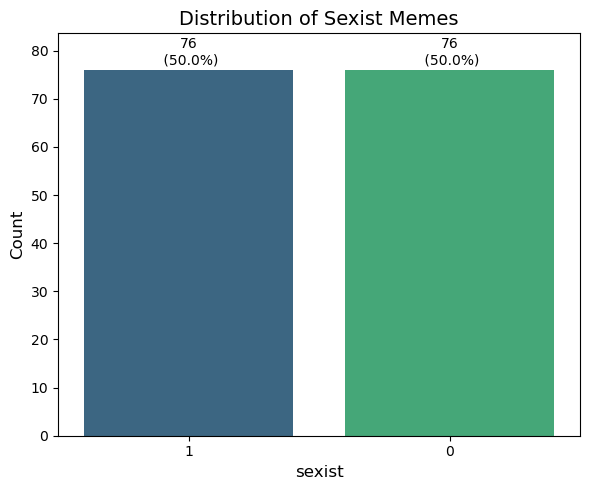

Total objectification instances when meme is sexist: 43
Total sexual-violence instances when meme is sexist: 16
Total stereotyping-dominance instances when meme is sexist: 40



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


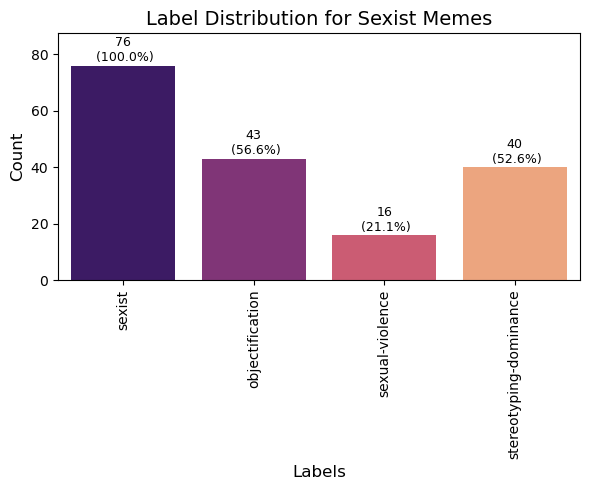

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


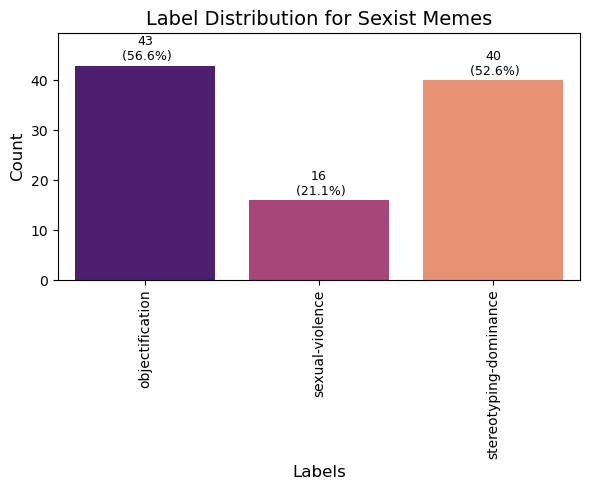

Total non-sexist instances: 76
Total objectification instances when meme is non-sexist: 0
Total sexual-violence instances when meme is non-sexist: 0
Total stereotyping-dominance instances when meme is non-sexist: 0


In [12]:
#analyze the new test split with overlapping fine-grained labels
analyze_label_distribution(exist_test_overlap, "sexist", new_exist_labels,split="test",dataset="EXIST2024")

### MAMI

#### Train and dev

In [13]:
#repeat the processing with MAMI
#take the splits already processed for regular in-domain setup and merge them into one whole df again 
#to drop the non-overlapping categories and split into training and validation again
mami_training_data = "../data/MAMI/MAMI_training.json"
mami_dev_data = "../data/MAMI/MAMI_validation.json"
mami_train_df = pd.read_json(mami_training_data,orient='index')
mami_dev_df = pd.read_json(mami_dev_data,orient="index")

mami_train_df = pd.concat([mami_train_df, mami_dev_df]).sort_index()

In [14]:
mami_train_overlap = pd.concat([mami_train_df.iloc[:,:7],mami_train_df[mami_labels_overlapping]],axis=1).astype(str) #get the first columns with data and binary class and only the overlapping categories
mami_only_positive = mami_train_overlap.loc[mami_train_overlap["misogynous"] == "1"] #only the instances with positive class in binary level
mami_only_positive_classes = mami_only_positive[mami_labels_overlapping]
all_zeros = mami_only_positive_classes[(mami_only_positive_classes == "0").all(axis=1)] #get the instances for which there are no labels in the fine-grained classes
mami_train_overlap = mami_train_overlap.drop(index=all_zeros.index) #drop the instances with no labels in the fine-grained classes when the meme is positive at binary label (misogynyous/sexist)

In [15]:
#double checking that there are indeed no classes with 0 under the positive binary class
mami_only_positive = mami_train_overlap.loc[mami_train_overlap["misogynous"] == "1"] #only the instances with positive class in binary level
mami_only_positive_classes = mami_only_positive[mami_labels_overlapping]
all_zeros = mami_only_positive_classes[(mami_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
print(f"There are {len(all_zeros)} mysonous memes with no fine-grained label\n")
all_zeros.info()

There are 0 mysonous memes with no fine-grained label

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   stereotype       0 non-null      object
 1   objectification  0 non-null      object
 2   violence         0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [16]:
#check distribution of labels before reducing size
new_mami_labels = ["misogynous"]+mami_labels_overlapping
print(f"Label distribution for MAMI training\n")
non_label_instances = mami_train_overlap["misogynous"].value_counts().get("0", 0)
print(f"Total non-misogynous instances: {non_label_instances}")
    
#count total instances for each label
for lbl in new_mami_labels:
    total = mami_train_overlap[lbl].value_counts().get("1", 0)
    print(f"Total {lbl} instances: {total}")

Label distribution for MAMI training

Total non-misogynous instances: 5000
Total misogynous instances: 4352
Total stereotype instances: 2810
Total objectification instances: 2202
Total violence instances: 953


In [17]:
mami_df_reduced = pd.DataFrame() #create a new df for the reduced instances
#downsample each class
df_negative = mami_train_overlap[(mami_train_overlap[new_mami_labels] == "0").all(axis=1)] #get the negative instances (those that are 0 along all classes only)
df_negative = df_negative.sample(n=667, random_state=0)
#get instances with each fine-grained class only when binary class is positive
df_objectification = mami_train_overlap[(mami_train_overlap[["misogynous","objectification"]] == "1").all(axis=1)]  
df_objectification = df_objectification.sample(n=300, random_state=0)  #downsample to target
df_violence = mami_train_overlap[(mami_train_overlap[["misogynous","violence"]] == "1").all(axis=1)]
df_violence = df_violence.sample(n=110, random_state=0)
df_stereotype = mami_train_overlap[(mami_train_overlap[["misogynous","stereotype"]] == "1").all(axis=1)]
df_stereotype = df_stereotype.sample(n=265, random_state=0)
mami_df_reduced = pd.concat([mami_df_reduced,df_negative,df_violence,df_objectification,df_stereotype]).drop_duplicates() #add to new dataset and drop duplicate indeces

In [18]:
#check distribution of labels after reducing size
print(f"Label distribution for MAMI training\n")
non_label_instances = mami_df_reduced["misogynous"].value_counts().get("0", 0)
print(f"Total non-misogynous instances: {non_label_instances}")
    
#count total instances for each label
for lbl in new_mami_labels:
    total = mami_df_reduced[lbl].value_counts().get("1", 0)
    print(f"Total {lbl} instances: {total}")

Label distribution for MAMI training

Total non-misogynous instances: 667
Total misogynous instances: 649
Total stereotype instances: 449
Total objectification instances: 412
Total violence instances: 197


In [19]:
#now let's do stratified sampling for MAMI dataset to divide it into trainig and dev (90% - 10%)
mami_train_red_df, mami_dev_red_df = split_multilabel_data(mami_df_reduced, new_mami_labels, test_size=0.1, random_state=0)

Label distribution for MAMI training

Total non-misogynous instances: 601
Total misogynous instances: 583
Total stereotype instances: 402
Total objectification instances: 369
Total violence instances: 176



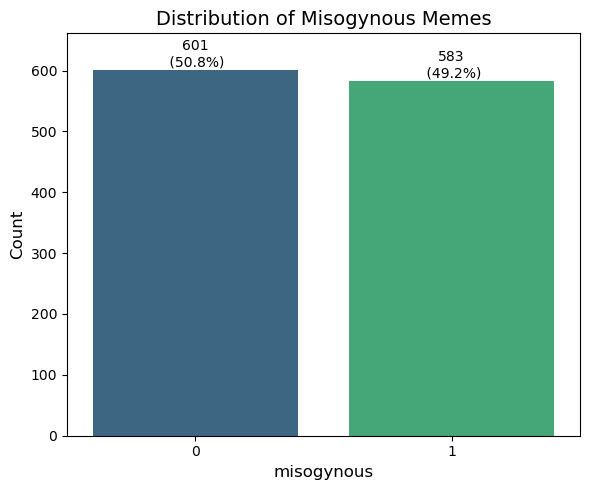

Total stereotype instances when meme is misogynous: 402
Total objectification instances when meme is misogynous: 369
Total violence instances when meme is misogynous: 176



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


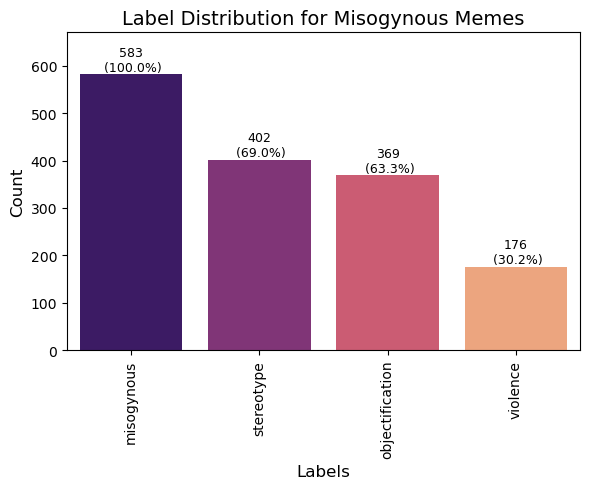

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


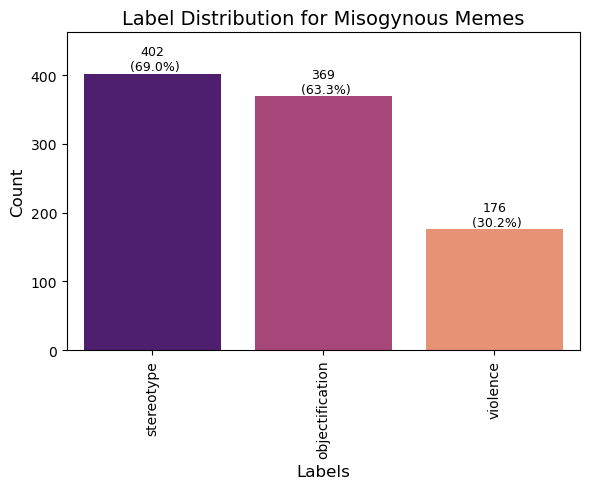

Total non-misogynous instances: 601
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 0
Total violence instances when meme is non-misogynous: 0


In [20]:
#analyze the new training split with overlapping fine-grained labels
analyze_label_distribution(mami_train_red_df, "misogynous", new_mami_labels,split="training")

Label distribution for MAMI validation

Total non-misogynous instances: 66
Total misogynous instances: 66
Total stereotype instances: 47
Total objectification instances: 43
Total violence instances: 21



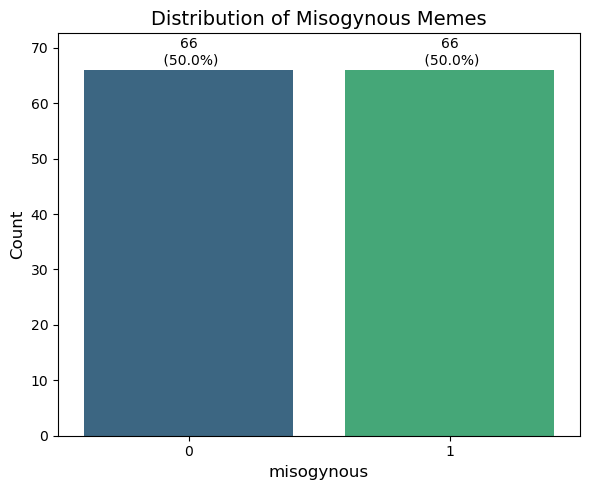

Total stereotype instances when meme is misogynous: 47
Total objectification instances when meme is misogynous: 43
Total violence instances when meme is misogynous: 21



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


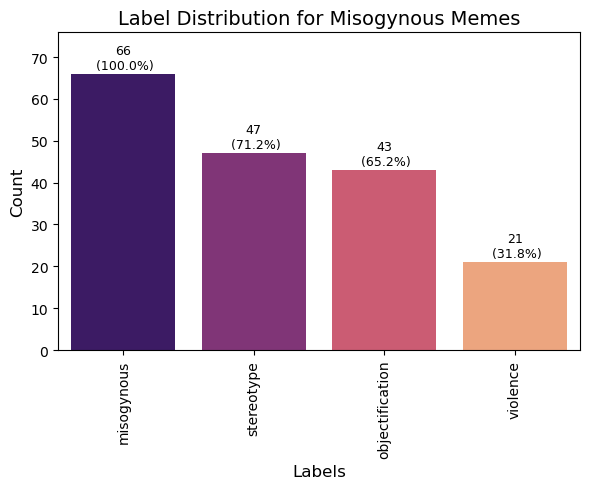

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


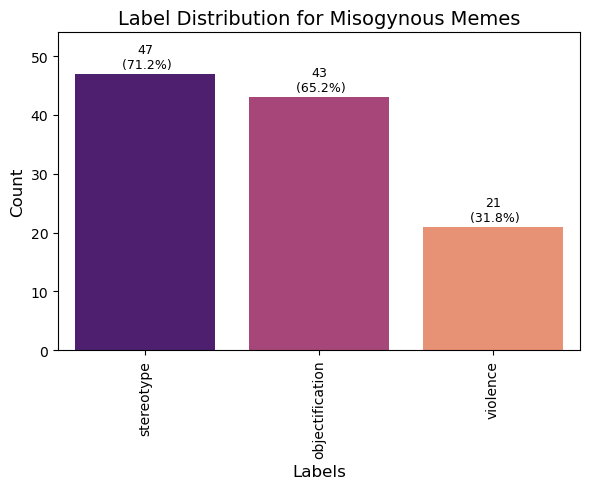

Total non-misogynous instances: 66
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 0
Total violence instances when meme is non-misogynous: 0


In [21]:
#analyze the new training split with overlapping fine-grained labels
analyze_label_distribution(mami_dev_red_df, "misogynous", new_mami_labels,split="validation")

#### Test

In [22]:
#dropping non-overlapping categories from test set
mami_test_data = "../data/MAMI/MAMI_test.json"
mami_test_df = pd.read_json(mami_test_data,orient="index")

mami_test_overlap = pd.concat([mami_test_df.iloc[:,:7],mami_test_df[mami_labels_overlapping]],axis=1).astype(str) #get the first columns with data and binary class and only the overlapping categories
mami_only_positive = mami_test_overlap.loc[mami_test_overlap["misogynous"] == "1"] #only the instances with positive class in binary level
mami_only_positive_classes = mami_only_positive[mami_labels_overlapping]
all_zeros = mami_only_positive_classes[(mami_only_positive_classes == "0").all(axis=1)] #get the instances for which there are no labels in the fine-grained classes
mami_test_overlap = mami_test_overlap.drop(index=all_zeros.index) #drop the instances with no labels in the fine-grained classes when the meme is positive at binary label (misogynyous/sexist)

In [23]:
#double checking that there are indeed no classes with 0 under the positive binary class
mami_only_positive = mami_test_overlap.loc[mami_test_overlap["misogynous"] == "1"] #only the instances with positive class in binary level
mami_only_positive_classes = mami_only_positive[mami_labels_overlapping]
all_zeros = mami_only_positive_classes[(mami_only_positive_classes == "0").all(axis=1)]
#check whether there are no fine-grained labels in the positive binary instances
print(f"There are {len(all_zeros)} mysonous memes with no fine-grained label\n")
all_zeros.info()

There are 0 mysonous memes with no fine-grained label

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   stereotype       0 non-null      object
 1   objectification  0 non-null      object
 2   violence         0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


Label distribution for MAMI test

Total non-misogynous instances: 500
Total misogynous instances: 476
Total stereotype instances: 350
Total objectification instances: 348
Total violence instances: 153



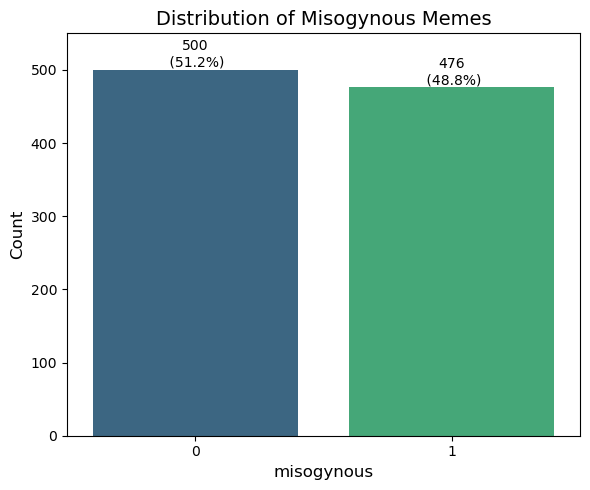

Total stereotype instances when meme is misogynous: 350
Total objectification instances when meme is misogynous: 348
Total violence instances when meme is misogynous: 153



/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


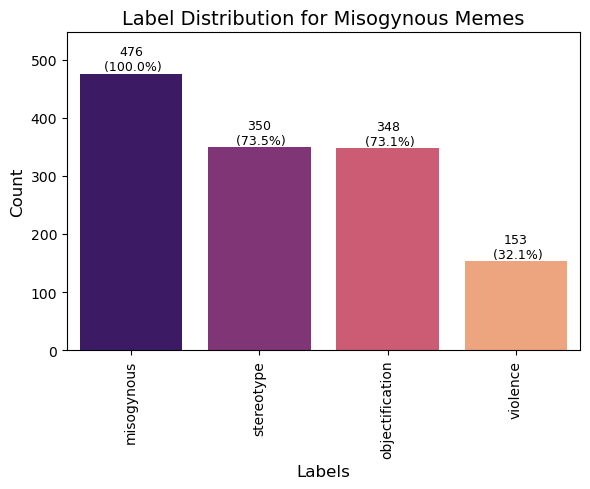

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


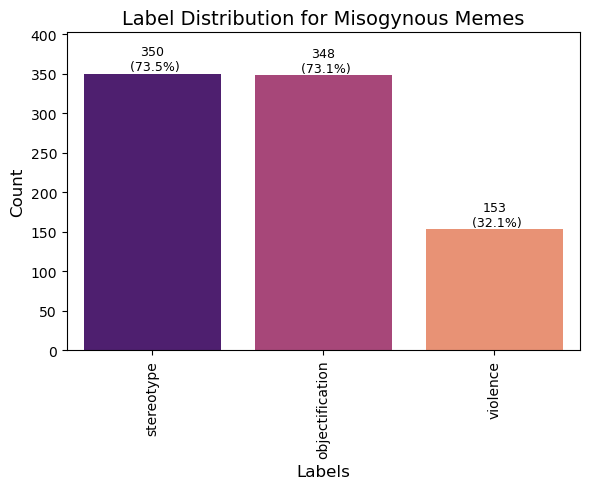

Total non-misogynous instances: 500
Total stereotype instances when meme is non-misogynous: 0
Total objectification instances when meme is non-misogynous: 0
Total violence instances when meme is non-misogynous: 0


In [24]:
#analyze the new test split with overlapping fine-grained labels
analyze_label_distribution(mami_test_overlap, "misogynous", new_mami_labels,split="test")

#### Save new splits

In [27]:
dataset_names = ["EXIST2024","MAMI"]
splits = ["training","validation","test"]

#return back to dict to save to json format
exist_train_dict = exist_train_df.astype(str).to_dict(orient="index") 
exist_val_dict = exist_val_df.astype(str).to_dict(orient="index")
exist_test_dict = exist_test_overlap.astype(str).to_dict(orient="index")
mami_train_red_dict = mami_train_red_df.astype(str).to_dict(orient="index") 
mami_val_red_dict = mami_dev_red_df.astype(str).to_dict(orient="index")
mami_test_dict = mami_test_overlap.astype(str).to_dict(orient="index")
dataset_dicts = {
    "EXIST2024": [exist_train_dict, exist_val_dict, exist_test_dict],
    "MAMI": [mami_train_red_dict, mami_val_red_dict, mami_test_dict],
}

#save the split dictionary to a JSON file
for dataset in dataset_names:
    for split, data_dict in zip(splits, dataset_dicts[dataset]):
        output_dir = f"../data/overlapping_classes/{dataset}"
        os.makedirs(output_dir, exist_ok=True)  #create the directory if it doesn't exist
        
        output_file = f"{output_dir}/{dataset}_{split}.json"
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(data_dict, f, ensure_ascii=False, indent=4)
        print(f"Saved {dataset} {split} split to {output_file}")

Saved EXIST2024 training split to ../data/overlapping_classes/EXIST2024/EXIST2024_training.json
Saved EXIST2024 validation split to ../data/overlapping_classes/EXIST2024/EXIST2024_validation.json
Saved EXIST2024 test split to ../data/overlapping_classes/EXIST2024/EXIST2024_test.json
Saved MAMI training split to ../data/overlapping_classes/MAMI/MAMI_training.json
Saved MAMI validation split to ../data/overlapping_classes/MAMI/MAMI_validation.json
Saved MAMI test split to ../data/overlapping_classes/MAMI/MAMI_test.json


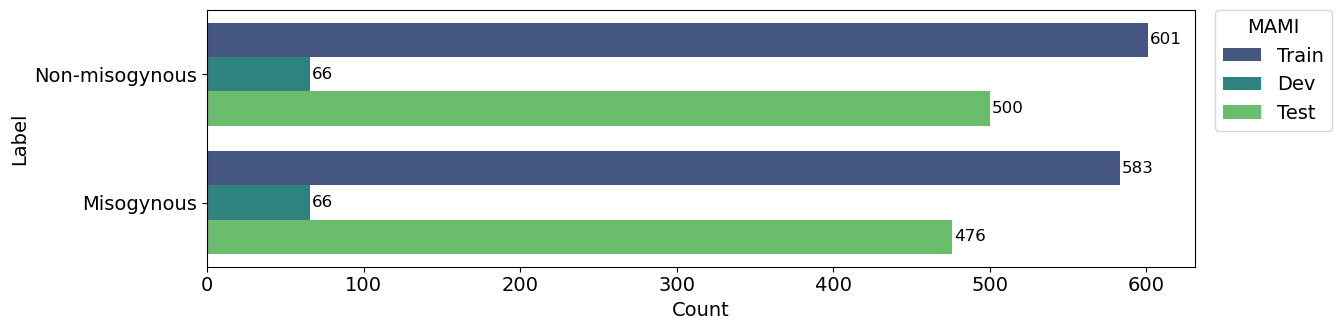

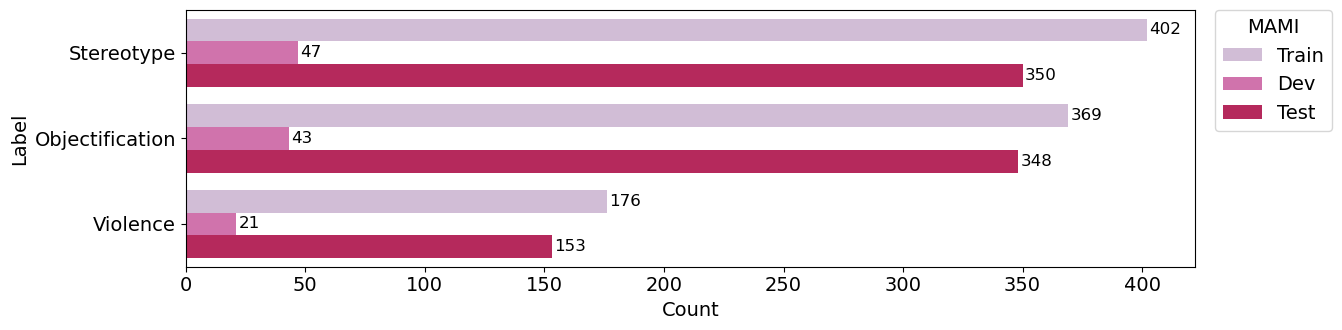

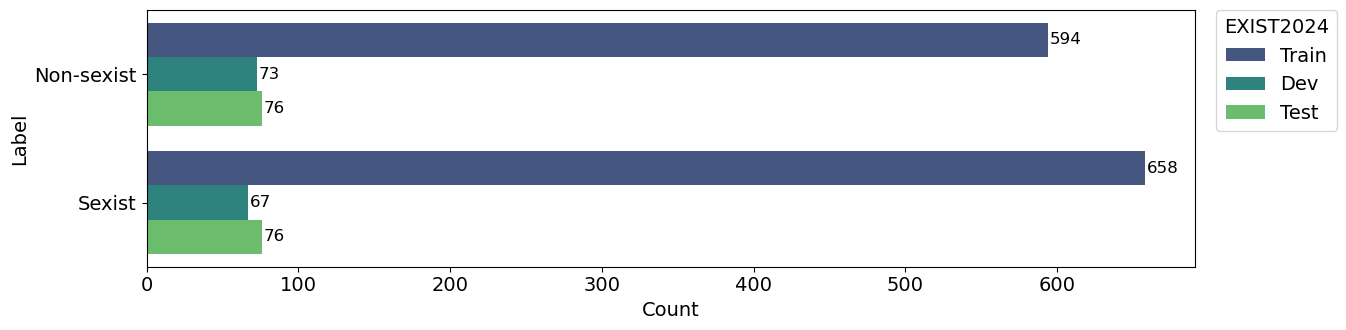

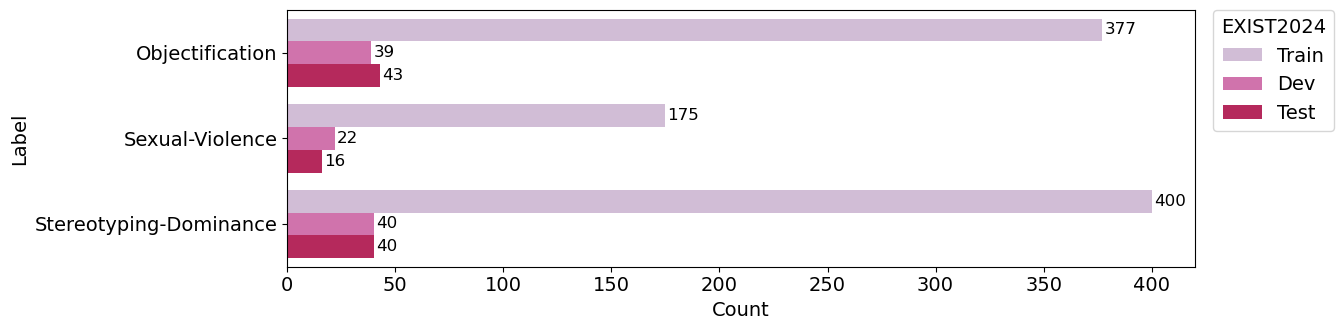

In [27]:
## analyze distribution altogether:
mami_training_red_df = pd.read_json("../data/overlapping_classes/MAMI/MAMI_training.json",orient='index',dtype=str,)
mami_test_red_df = pd.read_json("../data/overlapping_classes/MAMI/MAMI_test.json",orient='index',dtype=str)
mami_val_red_df = pd.read_json("../data/overlapping_classes/MAMI/MAMI_validation.json",orient='index',dtype=str)

plot_binary_label_distribution(
    dfs=[mami_training_red_df,mami_val_red_df,mami_test_red_df],
    label="misogynous",
    ds_names=["MAMI"]*3,
    splits=["Train","Dev","Test"]
)
plot_label_distribution_filtered_df_multi(
    dfs=[mami_training_red_df,mami_val_red_df,mami_test_red_df],
    labels=["stereotype","objectification","violence"],
    ds_names=["MAMI"]*3,
    target_value="1",
    splits=["Train","Dev","Test"]
)

## analyze distribution altogether:
exist_training_red_df = pd.read_json("../data/overlapping_classes/EXIST2024/EXIST2024_training.json",orient='index',dtype=str,)
exist_test_red_df = pd.read_json("../data/overlapping_classes/EXIST2024/EXIST2024_test.json",orient='index',dtype=str)
exist_val_red_df = pd.read_json("../data/overlapping_classes/EXIST2024/EXIST2024_validation.json",orient='index',dtype=str)

plot_binary_label_distribution(
    dfs=[exist_training_red_df,exist_val_red_df,exist_test_red_df],
    label="sexist",
    ds_names=["EXIST2024"]*3,
    splits=["Train","Dev","Test"]
)
plot_label_distribution_filtered_df_multi(
    dfs=[exist_training_red_df,exist_val_red_df,exist_test_red_df],
    labels=["objectification","sexual-violence","stereotyping-dominance"],
    ds_names=["EXIST2024"]*3,
    target_value="1",
    splits=["Train","Dev","Test"]
)